In [2]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import cv2

In [3]:
# !ls
print(os.path)

<module 'ntpath' from 'C:\\Users\\Admin\\AppData\\Local\\Programs\\Python\\Python37\\lib\\ntpath.py'>


In [4]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

In [5]:
print(np.shape(y_train), np.shape(x_train))
print(np.shape(y_test), np.shape(x_test))

(60000,) (60000, 28, 28)
(10000,) (10000, 28, 28)


In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [7]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.33711725,  0.36941925, -0.03939605, -0.58818346,  0.31722963,
         0.20390122, -0.6604016 , -0.0077405 ,  0.75236803,  0.2171732 ]],
      dtype=float32)

In [8]:
tf.nn.softmax(predictions).numpy()

array([[0.06401772, 0.12976128, 0.08621819, 0.04980392, 0.12316277,
        0.1099668 , 0.04633398, 0.08899113, 0.19030827, 0.11143599]],
      dtype=float32)

In [9]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [10]:
loss_fn(y_train[:1], predictions).numpy()

2.2075768

In [24]:
model.compile(optimizer='adam', loss=loss_fn, metrics='accuracy')

In [87]:
model.fit(x_train, y_train, epochs=1000, steps_per_epoch=10, validation_data=(x_test, y_test), validation_steps = 3)

_loss: 0.1272 - val_accuracy: 0.9804
Epoch 865/1000
10/10 [==============================] - 1s 75ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.1238 - val_accuracy: 0.9814
Epoch 866/1000
10/10 [==============================] - 1s 76ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.1238 - val_accuracy: 0.9808
Epoch 867/1000
10/10 [==============================] - 1s 80ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.1238 - val_accuracy: 0.9807
Epoch 868/1000
10/10 [==============================] - 1s 83ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.1249 - val_accuracy: 0.9803
Epoch 869/1000
10/10 [==============================] - 1s 87ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.1262 - val_accuracy: 0.9805
Epoch 870/1000
10/10 [==============================] - 1s 88ms/step - loss: 0.0018 - accuracy: 0.9993 - val_loss: 0.1285 - val_accuracy: 0.9802
Epoch 871/1000
10/10 [==============================] - 1s 86ms/step - loss: 0.0017 - accurac

In [12]:
# model.save("mnist_model")
reconstructed_model = tf.keras.models.load_model("mnist_model")

In [13]:
probability_model = tf.keras.Sequential([
    reconstructed_model,
    tf.keras.layers.Softmax()
])

In [14]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[0.10239561, 0.09003241, 0.14020514, 0.05654768, 0.1043653 ,
        0.09454724, 0.06034408, 0.10085867, 0.15449135, 0.09621255],
       [0.08178053, 0.07769595, 0.11901091, 0.04894262, 0.08336154,
        0.11918189, 0.05301713, 0.11541414, 0.14796196, 0.15363342],
       [0.0843499 , 0.08396009, 0.12150569, 0.0682441 , 0.09627423,
        0.1256828 , 0.09562023, 0.1059554 , 0.1155457 , 0.10286182],
       [0.0424902 , 0.11112343, 0.16217539, 0.03829325, 0.08272832,
        0.074021  , 0.0330621 , 0.06119274, 0.22079626, 0.17411737],
       [0.12454905, 0.06892145, 0.12582874, 0.06908361, 0.10920274,
        0.11527907, 0.06892461, 0.08997118, 0.13131227, 0.09692731]],
      dtype=float32)>

In [15]:
pred = reconstructed_model.predict(x_test, 1)
print(pred)

[[ 0.15948611  0.03081196  0.47374904 ...  0.14436251  0.57078034
   0.09720199]
 [-0.18884717 -0.24008302  0.1863288  ...  0.15564051  0.40406874
   0.441683  ]
 [-0.16578987 -0.17042176  0.19919756 ...  0.06225482  0.14890254
   0.03262296]
 ...
 [-0.51046914 -0.21679442  0.74706864 ...  0.06610459  0.58571327
   0.7004456 ]
 [-0.2943906  -0.05071964  0.3058217  ...  0.33778352  0.9648963
  -0.11294217]
 [-0.59562707 -0.48290008  0.2172534  ... -0.26302785  0.45879468
   0.34968293]]


[[ 142.25224  179.82153  388.58466 -552.2491    85.05655  198.17053
  -693.01544  157.47153  223.65419  272.54144]]
[[  55.369385  223.38544   338.55667  -412.52704  -183.14966   383.768
  -657.67664   125.235016  303.02225   202.6698  ]]
[[  89.42222    60.901054  254.22374  -456.10556   188.37196   389.45752
  -738.3379     36.16606   220.25891   310.6727  ]]


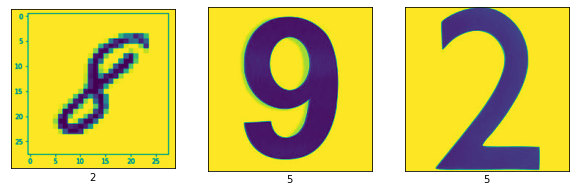

In [17]:
root = 'C:\\Users\\Admin\\Desktop\\WORK\\Deep Learning\\Deep-Learning\\MNIST\\dataset'
testing = []
i=1
plt.figure(figsize=(10,10))
for sample in os.listdir(root):
    img_path = root + '\\' + sample
    img = cv2.imread(img_path, 0)
    plt.subplot(1,3,i)
    i=i+1
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    img = cv2.resize(img, (28,28))
    image = (np.expand_dims(img,0))
    image = np.array(image)
    pred = reconstructed_model.predict(image,1)
    print(pred)
    plt.xlabel(pred.argmax())